In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df1 = pd.read_csv('03_Cleaned_File(Data Preprocessing).csv')

In [3]:
df1.head()

,CustomerId,Surname,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,0,42,101348.88,0.00,1,1,2,1,1,0,0
1,15647311,Hill,608,0,41,112542.58,83807.86,1,1,1,1,0,0,1
2,15619304,Onio,502,0,42,113931.57,159660.80,3,0,8,0,1,0,0
3,15701354,Boni,699,0,39,93826.63,0.00,2,0,1,0,0,0,0
4,15737888,Mitchell,850,0,43,79084.10,125510.82,1,1,2,1,0,0,1


In [4]:
X = df1.drop(columns = ['CustomerId', 'Surname', 'Exited'])
y = df1['Exited']

In [5]:
y.value_counts() # Dataset Imbalanced

Exited
0    7960
1    2037
Name: count, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
X_train.head()

,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Geography_Germany,Geography_Spain
4032,601,0,42,199242.65,96763.89,1,1,4,1,0,1
4374,614,0,34,185561.89,0.00,2,0,5,0,0,0
6695,638,1,41,47675.29,131762.94,1,1,1,1,0,0
4896,544,0,40,161076.92,0.00,1,1,7,1,0,0
1101,512,0,32,80120.19,123403.85,2,0,2,0,1,0


In [8]:
scalar = StandardScaler()
columns = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance']
X_train[columns] = scalar.fit_transform(X_train[columns])
X_test[columns] = scalar.transform(X_test[columns])

In [9]:
y_train.value_counts() 

Exited
0    5992
1    1505
Name: count, dtype: int64

In [10]:
under_sampling = RandomUnderSampler(random_state = 42)
X_train, y_train = under_sampling.fit_resample(X_train, y_train)

In [11]:
y_train.value_counts()

Exited
0    1505
1    1505
Name: count, dtype: int64

In [12]:
model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [13]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [14]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1438  530]
 [ 170  362]]


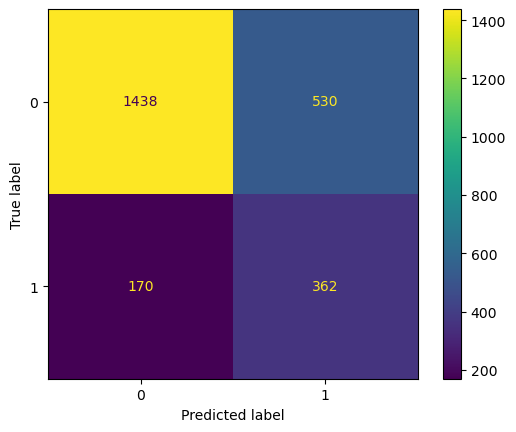

In [15]:
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [16]:
class0_accuracy = cm[0,0] / cm[0].sum()
class1_accuracy = cm[1,1] / cm[1].sum()
print(f"Class 0 Accuracy: {class0_accuracy:.2f}")
print(f"Class 1 Accuracy: {class1_accuracy:.2f}")

Class 0 Accuracy: 0.73
Class 1 Accuracy: 0.68


In [17]:
print(f'Accuracy : {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision : {precision_score(y_test, y_pred):.2f}')
print(f'Recall : {recall_score(y_test, y_pred):.2f}')
print(f'F1 Score : {f1_score(y_test, y_pred):.2f}')

Accuracy : 0.72
Precision : 0.41
Recall : 0.68
F1 Score : 0.51


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1968
           1       0.41      0.68      0.51       532

    accuracy                           0.72      2500
   macro avg       0.65      0.71      0.66      2500
weighted avg       0.79      0.72      0.74      2500

